 ## 0. Подгрузка модулей

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# AER dataset

[Ссылка на скачивание](https://www.kaggle.com/dansbecker/aer-credit-card-data)

Таблица содержит информацию о выдаче карты клиенту. 


 ## 1.1. Подгрузка данных

In [3]:
df = pd.read_csv("raw_data/[11] AER_credit_card_data.csv",
                  sep = ',')

df = df.rename(columns={'card': 'target'})
df.head()

,target,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## 1.2.  Предобработка данных

Булевые переменные записываем в числовом формате. Целевой фактор обрабатываем отдельно и инверсионно, так как для нас число 1 означает дефолт и наоборот.

In [4]:
df[df.columns[0]] = df[df.columns[0]].replace('yes', 0)
df[df.columns[0]] = df[df.columns[0]].replace('no', 1)
for item in df.columns[1:]:
    df[item] = df[item].replace('yes', 1)
    df[item] = df[item].replace('no', 0)

In [5]:
df.head()

,target,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,0,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,0,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,0,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,0,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


## 2.  Анализ факторов


### Список факторов



| No. | Attribute | Type | Description | Values (if qualitative)
| -:- | --- | --- | --- | ---
| 0 | target | binary | __0__ if application for credit card accepted, __1__ if not | - |
| 1 | reports | numeric | Number of major derogatory reports | - |
| 2 | age | numeric | Age n years plus twelfths of a year | - |
| 3 | income | numeric | Yearly income (divided by 10,000) | - |
| 4 | share | numeric | Ratio of monthly credit card expenditure to yearly income | - |
| 5 | expenditure | numeric | Average monthly credit card expenditure | - |
| 6 | owner | binary | 1 if owns their home, 0 if rent | - |
| 7 | selfemp | binary | 1 if self employed, 0 if not | - |
| 8 | dependents | numeric | 1 + number of dependents | - |
| 9 | months | numeric | Months living at current address | - |
| 10 | majorcards | binary | Number of major credit cards held | - |
| 11 | active | numeric | Number of active credit accounts | - |

Видим, что числовые факторы преобладают, а категориальных нет вообще.

### Разбиваем на train/test, записываем типы переменных и сохраняем.

In [11]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
# !mkdir Users/vaneque/Desktop/L'ecole /Model risks/Data/
X_train.to_parquet("samples/X_train.parquet")
X_test.to_parquet("samples/X_test.parquet")
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet("samples/y_train.parquet")
pd.DataFrame(y_test).to_parquet("samples/y_test.parquet")

# сохраняем списки категориальных и колич. переменных
cat_vals = []
num_vals = ['reports', 'age', 'income', 'share', 'expenditure', 'owner',
           'selfemp', 'dependents', 'months', 'majorcards', 'active']

with open("factors.json", 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals}, f)

## 3. Статистики и пропуски

### Статистики

In [12]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 1319
Количество факторов: 11
Количество целевых событий: 296
Доля целевых событий: 22.44%


### Пропуски
Пропуски в данных отсутствуют.

In [13]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / df.shape[0] * 100):.2f}%')

Количество пропусков по фактору reports:
	0 или 0.00%
Количество пропусков по фактору age:
	0 или 0.00%
Количество пропусков по фактору income:
	0 или 0.00%
Количество пропусков по фактору share:
	0 или 0.00%
Количество пропусков по фактору expenditure:
	0 или 0.00%
Количество пропусков по фактору owner:
	0 или 0.00%
Количество пропусков по фактору selfemp:
	0 или 0.00%
Количество пропусков по фактору dependents:
	0 или 0.00%
Количество пропусков по фактору months:
	0 или 0.00%
Количество пропусков по фактору majorcards:
	0 или 0.00%
Количество пропусков по фактору active:
	0 или 0.00%


## 4. Визуальный анализ и выбросы

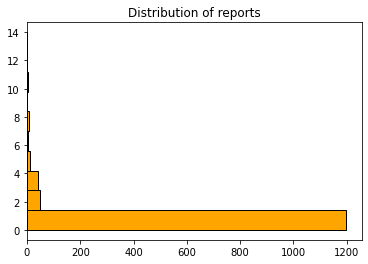

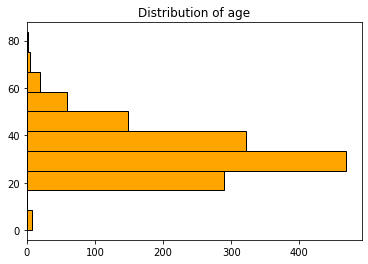

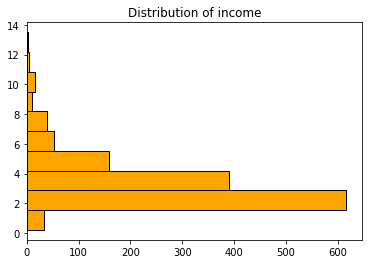

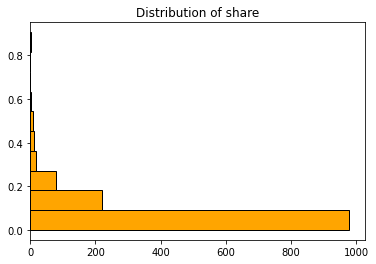

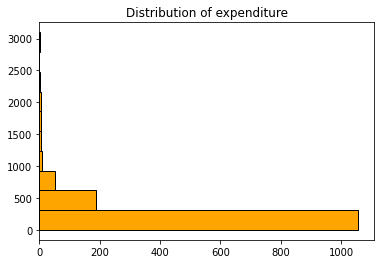

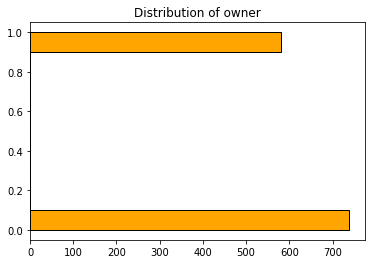

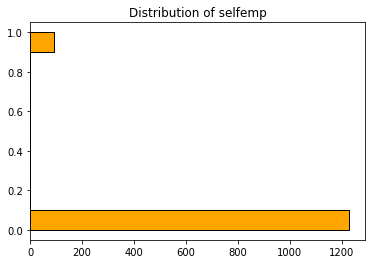

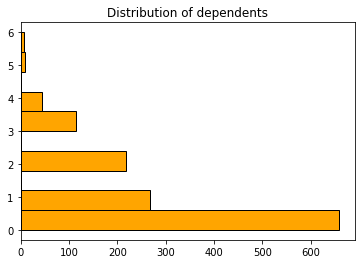

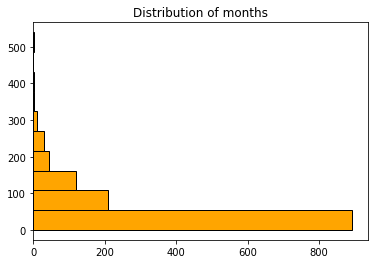

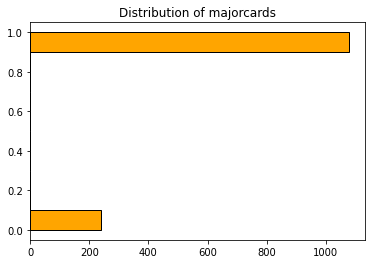

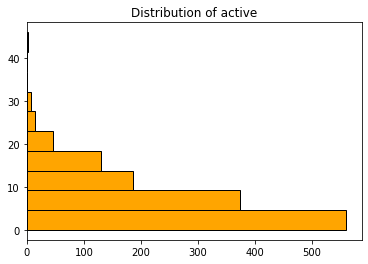

In [14]:
for col in X.columns:
    plt.hist(X[col], color='orange', ec='black', orientation = 'horizontal' )
    plt.title(f'Distribution of {col}')
    plt.show()

Приятный датасет, выбросов и пропусков нет, однако очень мало записей и факторов. Доля целевых событий удовлетворительна.